aim:to dectect wild fire

In [ ]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

fetching path

In [ ]:
datadir="/content/drive/MyDrive/forest_fire/Training and Validation"
os.listdir(datadir)

['fire', 'nofire']

append data to x and y train

In [ ]:
X_train=[]
Y_train=[]
categories=['fire', 'nofire']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(224,224,3))
    X_train.append(list(img_resized))
    Y_train.append(categories.index(category))

In [ ]:
datadir2="/content/drive/MyDrive/forest_fire/Testing"
os.listdir(datadir2)

['nofire', 'fire']

In [ ]:
X_test=[]
Y_test=[]
categories=['fire', 'nofire']
for category in categories:
  path=os.path.join(datadir2,category)
  images=os.listdir(path)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(224,224,3))
    X_test.append(list(img_resized))
    Y_test.append(categories.index(category))

converting to 1D

In [ ]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1832, 224, 224, 3), (1832,), (68, 224, 224, 3), (68,))

creating layers


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

fitting data into cnn model

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=12)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8346 - loss: 0.4960
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9483 - loss: 0.1626
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9615 - loss: 0.1029
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9584 - loss: 0.1128
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9704 - loss: 0.0879
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9748 - loss: 0.0799
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9814 - loss: 0.0584
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9760 - loss: 0.0604
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9838 - loss: 0.0531
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9872 - loss: 0.0359
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9891 - loss: 0.0427
Epoch 12/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 

testing

In [ ]:
model.evaluate(X_test,Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.9506 - loss: 0.1014


[0.09507770836353302, 0.9558823704719543]

checking

array([[[182, 112,  78],
        [166,  96,  62],
        [150,  81,  48],
        ...,
        [ 77,  45,  32],
        [ 77,  43,  31],
        [ 77,  43,  31]],

       [[166,  96,  62],
        [155,  85,  51],
        [148,  77,  45],
        ...,
        [ 79,  47,  34],
        [ 79,  45,  33],
        [ 79,  45,  33]],

       [[153,  80,  45],
        [147,  77,  41],
        [147,  77,  43],
        ...,
        [ 80,  48,  35],
        [ 82,  48,  36],
        [ 82,  48,  36]],

       ...,

       [[247, 107,  45],
        [248, 108,  46],
        [252, 113,  48],
        ...,
        [ 63,  48,  45],
        [ 65,  49,  49],
        [ 65,  49,  49]],

       [[246, 103,  43],
        [247, 105,  43],
        [248, 106,  42],
        ...,
        [ 67,  52,  49],
        [ 69,  53,  53],
        [ 69,  53,  53]],

       [[249, 105,  45],
        [249, 105,  44],
        [249, 107,  45],
        ...,
        [ 79,  64,  61],
        [ 79,  63,  63],
        [ 79,  63,  63]]], dtype=uint8)
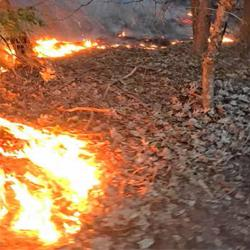

In [ ]:
img=imread('/content/drive/MyDrive/forest_fire/Testing/fire/abc169.jpg')
img

resize


In [ ]:
img=resize(img,(224,224,3))
img.shape

(224, 224, 3)

reshape

In [ ]:
img=img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [ ]:
y_new=model.predict(img)
y_new=(y_new>0.5)
print(y_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[[False]]


In [ ]:
if y_new==True:
  print("NO FIRE")
else:
  print("FIRE")

FIRE


saving model

In [ ]:
from keras.models import save_model
save_model(model, "fire.h5")